In [2]:
# ch28_2.py
import webbrowser

address = input("請輸入地址 : ")
webbrowser.open('http://www.google.com.tw/maps/place/' + address)

請輸入地址 : 高雄市鳥松區840號


False

### https://rate.bot.com.tw/xrt?Lang=zh-TW

In [3]:
# ch28_3.py
import requests

url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
htmlfile = requests.get(url)
print(type(htmlfile))

<class 'requests.models.Response'>


In [5]:
print(htmlfile.content)

b'<!DOCTYPE html>\r\n<html lang="zh-TW" class="no-js">\r\n<head>\r\n    <meta charset="utf-8" />\r\n    <title>\xe8\x87\xba\xe7\x81\xa3\xe9\x8a\x80\xe8\xa1\x8c\xe7\x89\x8c\xe5\x91\x8a\xe5\x8c\xaf\xe7\x8e\x87</title>\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n    <meta name="description" content="\xe8\x87\xba\xe7\x81\xa3\xe9\x8a\x80\xe8\xa1\x8c\xe5\x8c\xaf\xe7\x8e\x87\xe5\x88\xa9\xe7\x8e\x87\xe9\xbb\x83\xe9\x87\x91\xe7\x89\x8c\xe5\x83\xb9\xe6\x9f\xa5\xe8\xa9\xa2">\r\n    <meta name="keywords" content="">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">\r\n    <meta name="format-detection" content="telephone=no">\r\n        <meta name="robots" content="index,follow" />\r\n\r\n    <link rel="icon" type="image/x-icon" href="/favicon.ico">\r\n    <link rel="stylesheet" href="/Content/css/font-awesome.min.css">\r\n\r\n\r\n\r\n\r\n\r\n\r\n    <link rel="stylesheet" href="/Content/css/jquery-ui.min.css">\r\n    <link rel="styles

In [6]:
# ch28_4.py
import requests

url = 'http://www.csu.edu.tw'
htmlfile = requests.get(url)
if htmlfile.status_code == requests.codes.ok:
    print("取得網頁內容成功")
    print("網頁內容大小 = ", len(htmlfile.text))
else:
    print("取得網頁內容失敗")

取得網頁內容成功
網頁內容大小 =  217


In [7]:
# ch28_11.py
import requests, bs4

htmlFile = requests.get('https://deepmind.com.tw')
objSoup = bs4.BeautifulSoup(htmlFile.text, 'lxml')
print("列印BeautifulSoup物件資料型態 ", type(objSoup))

列印BeautifulSoup物件資料型態  <class 'bs4.BeautifulSoup'>


In [ ]:
print(objSoup.contents)

In [9]:
# ch28_27.py
import requests, bs4, os

url = 'http://www.xzw.com/fortune/'
htmlfile = requests.get(url)
objSoup = bs4.BeautifulSoup(htmlfile.text, 'lxml')      # 取得物件
constellation = objSoup.find('div', id='list')
cons = constellation.find('div', 'alb').find_all('div')

pict_url = 'http://www.xzw.com'
photos = []
for con in cons:
    pict = con.a.img['src']
    photos.append(pict_url+pict)

destDir = 'out28_27'
if os.path.exists(destDir) == False:            # 如果沒有此資料夾就建立
    os.mkdir(destDir)
print("搜尋到的圖片數量 = ", len(photos))       # 列出搜尋到的圖片數量
for photo in photos:                            # 迴圈下載圖片與儲存
    picture = requests.get(photo)               # 下載圖片
    picture.raise_for_status()                  # 驗證圖片是否下載成功
    print("%s 圖片下載成功" % photo)
# 先開啟檔案, 再儲存圖片
    pictFile = open(os.path.join(destDir, os.path.basename(photo)), 'wb')
    for diskStorage in picture.iter_content(10240):
        pictFile.write(diskStorage)
    pictFile.close()                            # 關閉檔案   

搜尋到的圖片數量 =  12
http://www.xzw.com/static/public/images/fortune/image/s_1.gif 圖片下載成功
http://www.xzw.com/static/public/images/fortune/image/s_2.gif 圖片下載成功
http://www.xzw.com/static/public/images/fortune/image/s_3.gif 圖片下載成功
http://www.xzw.com/static/public/images/fortune/image/s_4.gif 圖片下載成功
http://www.xzw.com/static/public/images/fortune/image/s_5.gif 圖片下載成功
http://www.xzw.com/static/public/images/fortune/image/s_6.gif 圖片下載成功
http://www.xzw.com/static/public/images/fortune/image/s_7.gif 圖片下載成功
http://www.xzw.com/static/public/images/fortune/image/s_8.gif 圖片下載成功
http://www.xzw.com/static/public/images/fortune/image/s_9.gif 圖片下載成功
http://www.xzw.com/static/public/images/fortune/image/s_10.gif 圖片下載成功
http://www.xzw.com/static/public/images/fortune/image/s_11.gif 圖片下載成功
http://www.xzw.com/static/public/images/fortune/image/s_12.gif 圖片下載成功


In [10]:
# ch28_28.py
import bs4, requests

url = 'http://www.taiwanlottery.com.tw'
html = requests.get(url)
print("網頁下載中 ...")
html.raise_for_status()                         # 驗證網頁是否下載成功                      
print("網頁下載完成")

objSoup = bs4.BeautifulSoup(html.text, 'lxml')  # 建立BeautifulSoup物件

dataTag = objSoup.select('.contents_box02')     # 尋找class是contents_box02
print("串列長度", len(dataTag))
for i in range(len(dataTag)):                   # 列出含contents_box02的串列                 
    print(dataTag[i])
        
# 找尋開出順序與大小順序的球
balls = dataTag[0].find_all('div', {'class':'ball_tx ball_green'})
print("開出順序 : ", end='')
for i in range(6):                              # 前6球是開出順序
    print(balls[i].text, end='   ')

print("\n大小順序 : ", end='')
for i in range(6,len(balls)):                   # 第7球以後是大小順序
    print(balls[i].text, end='   ')

# 找出第二區的紅球                   
redball = dataTag[0].find_all('div', {'class':'ball_red'})
print("\n第二區   :", redball[0].text)

網頁下載中 ...
網頁下載完成
串列長度 4
<div class="contents_box02">
<div id="contents_logo_02"></div><div class="contents_mine_tx02"><span class="font_black15">111/10/10 第111000081期 </span><span class="font_red14"><a href="Result_all.aspx#01">開獎結果</a></span></div><div class="contents_mine_tx04">開出順序<br/>大小順序<br/>第二區</div><div class="ball_tx ball_green">24 </div><div class="ball_tx ball_green">33 </div><div class="ball_tx ball_green">06 </div><div class="ball_tx ball_green">13 </div><div class="ball_tx ball_green">21 </div><div class="ball_tx ball_green">27 </div><div class="ball_tx ball_green">06 </div><div class="ball_tx ball_green">13 </div><div class="ball_tx ball_green">21 </div><div class="ball_tx ball_green">24 </div><div class="ball_tx ball_green">27 </div><div class="ball_tx ball_green">33 </div><div class="ball_red">01 </div>
</div>
<div class="contents_box02">
<div id="contents_logo_03"></div><div class="contents_mine_tx02"><span class="font_black15">111/10/10 第111000081期 </span><span class

In [12]:
!pip install twstock

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.2 MB/s 


In [13]:
# ch29_1.py
import twstock
stock2330 = twstock.Stock("2330")

print("股票代號   : ", stock2330.sid)
print("股票收盤價 : ", stock2330.price)

股票代號   :  2330
股票收盤價 :  [508.0, 512.0, 498.5, 496.0, 505.0, 490.5, 485.0, 486.0, 489.0, 472.5, 475.0, 486.5, 493.0, 480.0, 476.5, 472.0, 467.0, 476.5, 471.0, 464.5, 455.0, 446.5, 448.0, 438.0, 435.0, 422.0, 417.0, 429.0, 445.0, 451.0, 438.0]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38651 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31309 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38651 missing from current font.
  font.set_text

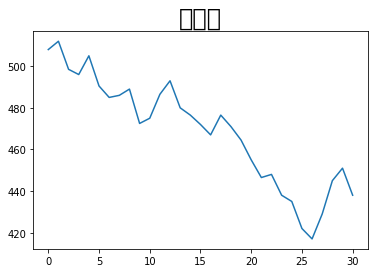

In [14]:
# ch29_2.py
import matplotlib.pyplot as plt
from pylab import mpl
import twstock

plt.rcParams["font.family"] = ["Microsoft JhengHei"]

stock2330 = twstock.Stock("2330")
plt.title("台積電", fontsize=24)
plt.plot(stock2330.price)
plt.show()

In [15]:
# ch29_3.py
import matplotlib.pyplot as plt
from pylab import mpl
import twstock

plt.rcParams["font.family"] = ["Microsoft JhengHei"]

stock2330 = twstock.Stock("2330")
stock2330.fetch_from(2022,1)
plt.title("台積電", fontsize=24)
plt.xlabel("2022年1月以來的交易天數", fontsize=14)
plt.ylabel("價格", fontsize=14)
plt.plot(stock2330.price)
plt.show()

ConnectionError: ignored